In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
# using a smaller dataset
X = mnist_data['data'][:7000]
y = mnist_data['target'][:7000]

print(X.shape)
print(y.shape)

(7000, 784)
(7000,)


In [4]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


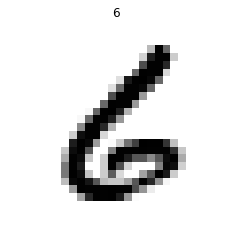

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

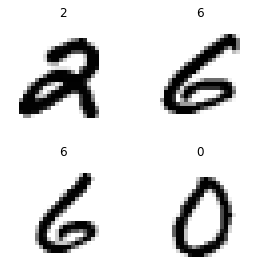

In [6]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [8]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [9]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [58]:
from models import Sequential
from layers import Linear, ReLU, Softmax, Tanh
from initializers import random_normal

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

In [59]:
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy

# prepare the model for training
model.configure(loss=CategoricalCrossentropy(),
                learning_rate=0.1,
                metrics={"acc": categorical_accuracy})

model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot);

loss=2.447899	val_loss=2.462140	acc=0.100667	val_acc=0.096000


In [60]:
# train the model
model.train(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot, epochs=100);

Epoch 01	loss=0.342545	val_loss=0.409998	acc=0.904333	val_acc=0.882000
Epoch 02	loss=0.208419	val_loss=0.286628	acc=0.943833	val_acc=0.922000
Epoch 03	loss=0.146860	val_loss=0.244675	acc=0.961833	val_acc=0.924000
Epoch 04	loss=0.104859	val_loss=0.223710	acc=0.973000	val_acc=0.930000
Epoch 05	loss=0.087511	val_loss=0.214520	acc=0.975833	val_acc=0.933000
Epoch 06	loss=0.065601	val_loss=0.212445	acc=0.985333	val_acc=0.933000
Epoch 07	loss=0.056522	val_loss=0.222963	acc=0.988500	val_acc=0.932000
Epoch 08	loss=0.056067	val_loss=0.241967	acc=0.984000	val_acc=0.932000
Epoch 09	loss=0.029254	val_loss=0.205427	acc=0.995500	val_acc=0.942000
Epoch 10	loss=0.090840	val_loss=0.299323	acc=0.973500	val_acc=0.914000
Epoch 11	loss=0.023898	val_loss=0.221314	acc=0.996000	val_acc=0.943000
Epoch 12	loss=0.016540	val_loss=0.217986	acc=0.999000	val_acc=0.943000
Epoch 13	loss=0.011227	val_loss=0.214789	acc=0.999667	val_acc=0.943000
Epoch 14	loss=0.008636	val_loss=0.211240	acc=0.999833	val_acc=0.947000
Epoch 

The model is overfitting the training set. Now let's see what regularization can do.

In [61]:
from regularizers import L2

# create the model
l2_model = Sequential()
l2_model.add(Linear(128, input_shape=(784,), kernel_regularizer=L2(0.1)))
l2_model.add(ReLU())
l2_model.add(Linear(64, kernel_regularizer=L2(0.1)))
l2_model.add(ReLU())
l2_model.add(Linear(10, kernel_regularizer=L2(0.1)))
l2_model.add(Softmax())

# prepare the model for training
l2_model.configure(loss=CategoricalCrossentropy(),
                learning_rate=0.1,
                metrics={'acc': categorical_accuracy})

print(l2_model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot))

loss=2.415818	val_loss=2.414152	acc=0.101167	val_acc=0.109000
{'loss': 2.415818135993831, 'val_loss': 2.4141518865143707, 'acc': 0.101166666, 'val_acc': 0.109}


In [62]:
# train the model
l2_model.train(X_train_normalized, y_train_one_hot,
               X_test_normalized,y_test_one_hot, epochs=100);

Epoch 01	loss=0.330923	val_loss=0.372362	acc=0.915000	val_acc=0.897000
Epoch 02	loss=0.234574	val_loss=0.286734	acc=0.939333	val_acc=0.916000
Epoch 03	loss=0.232643	val_loss=0.294940	acc=0.937000	val_acc=0.907000
Epoch 04	loss=0.182060	val_loss=0.251668	acc=0.951500	val_acc=0.926000
Epoch 05	loss=0.160020	val_loss=0.239100	acc=0.959167	val_acc=0.931000
Epoch 06	loss=0.158191	val_loss=0.239383	acc=0.960667	val_acc=0.935000
Epoch 07	loss=0.158676	val_loss=0.254820	acc=0.958333	val_acc=0.924000
Epoch 08	loss=0.138349	val_loss=0.224250	acc=0.970500	val_acc=0.943000
Epoch 09	loss=0.146989	val_loss=0.240984	acc=0.965333	val_acc=0.926000
Epoch 10	loss=0.134212	val_loss=0.229746	acc=0.969000	val_acc=0.935000
Epoch 11	loss=0.138815	val_loss=0.229675	acc=0.965833	val_acc=0.928000
Epoch 12	loss=0.132031	val_loss=0.222521	acc=0.969333	val_acc=0.932000
Epoch 13	loss=0.130675	val_loss=0.224420	acc=0.969000	val_acc=0.936000
Epoch 14	loss=0.121612	val_loss=0.212326	acc=0.976333	val_acc=0.945000
Epoch 

In [63]:
from layers import Dropout

# train a model with dropout
dropout_model = Sequential()
dropout_model.add(Linear(128, input_shape=(784,)))
dropout_model.add(ReLU())
dropout_model.add(Dropout(0.5))
dropout_model.add(Linear(64))
dropout_model.add(ReLU())
dropout_model.add(Dropout(0.5))
dropout_model.add(Linear(10))
dropout_model.add(Softmax())

# prepare the model for training
dropout_model.configure(loss=CategoricalCrossentropy(),
                        learning_rate=0.1,
                        metrics={'acc': categorical_accuracy})

print(dropout_model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot))

loss=2.405249	val_loss=2.391666	acc=0.111833	val_acc=0.111000
{'loss': 2.4052486241804516, 'val_loss': 2.391665833164501, 'acc': 0.111833334, 'val_acc': 0.111}


In [65]:
# train the model
dropout_model.train(X_train_normalized, y_train_one_hot,
                    X_test_normalized,y_test_one_hot, epochs=100);

Epoch 01	loss=0.004443	val_loss=0.295600	acc=0.999333	val_acc=0.947000
Epoch 02	loss=0.003603	val_loss=0.276782	acc=0.999833	val_acc=0.951000
Epoch 03	loss=0.004231	val_loss=0.301531	acc=0.999167	val_acc=0.947000
Epoch 04	loss=0.004614	val_loss=0.273729	acc=0.998667	val_acc=0.952000
Epoch 05	loss=0.004157	val_loss=0.276825	acc=0.999167	val_acc=0.950000
Epoch 06	loss=0.003457	val_loss=0.294946	acc=0.999500	val_acc=0.949000
Epoch 07	loss=0.007996	val_loss=0.316123	acc=0.997167	val_acc=0.946000
Epoch 08	loss=0.004201	val_loss=0.297155	acc=0.999000	val_acc=0.947000
Epoch 09	loss=0.003242	val_loss=0.302276	acc=0.999833	val_acc=0.951000
Epoch 10	loss=0.003938	val_loss=0.309057	acc=0.999333	val_acc=0.951000
Epoch 11	loss=0.008196	val_loss=0.324650	acc=0.997833	val_acc=0.948000
Epoch 12	loss=0.004041	val_loss=0.295978	acc=0.999333	val_acc=0.950000
Epoch 13	loss=0.003832	val_loss=0.301135	acc=0.999000	val_acc=0.951000
Epoch 14	loss=0.003082	val_loss=0.312484	acc=0.999500	val_acc=0.949000
Epoch 

KeyboardInterrupt: 

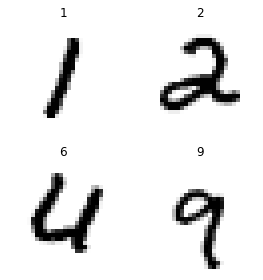

In [23]:
y_pred = np.argmax(model(X_train), axis=-1)

# plot a few predictions
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i+100], y_pred[i+100])

fig.tight_layout()
plt.show()

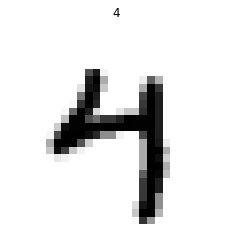

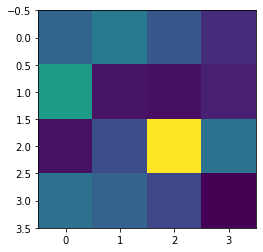

In [24]:
index = 10

plot_example(X_train[index], y_train[index])
plt.show()

# trying to visualize the activation of the first layer
A1 = model.layers[0].forward(X_train[index])
A1 = A1.reshape(4, 4)
plt.imshow(A1)
plt.show()